# Movie Recommender System

# Import Libraries

In [2]:
import numpy as np
#Used for creating multi dimensional arrays
import pandas as pd
#Used for reading the data set 

In [5]:
column_names = ['user_id','item_id','rating','timestamp']
#Create a new list of column names
df = pd.read_csv('u.data', sep="\t", names=column_names)
#Replace the column names in the dataset and create a new dataset 

In [8]:
df.head()
#Displays top 5 items in the dataset - df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [10]:
movie_titles = pd.read_csv("Movie_Id_Titles")
#Creating a new dataset 
movie_titles.head()
#Displays top 5 items in the dataset 

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [12]:
df= pd.merge(df,movie_titles,on='item_id')
#Merging the two data sets on item_id

In [13]:
df.head()
#Displays top 5 items in the dataset 

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# Exploratory Data Analysis 

## Exploring the dataset to learn more about the data 

Visualizations Import

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('white')
#Gives white background for the visualizations 
%matplotlib inline 
#Helps to visualize the graphs in Juypter Notebook 

Creating new dataframe with average rating and number of ratings 

In [21]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()
#Grouping the ratings by the title and calculating the mean and sorting the data frame 

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

Here we can observe that the average ratings of the movies are 5.0 and these are the movies less heard of. There might be a possibility that either these movies are really good or the number of ratings giving to these are less. So now I will create a dataframe w.r.t. the number of ratings given to the movies. 
    

In [24]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()
#Grouping the ratings by the title and calculating the count and sorting the data frame 

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

The inference mentioned above is proved to be correct and we can observe that none of the movies with higher ratings are mentioned in previous rating. 

In [26]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
#creating a new dataframe of mean ratings and storing the value in ratings 
ratings.head()
#Displaying the top 3 values of the dataframe

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [37]:
ratings['Num_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
#Storing the number of ratings in the dataset ratings
ratings.sort_values("Num_of_ratings",ascending=False).head()
#Sorting and Displaying the top 5 values of the dataframe 

,rating,Num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


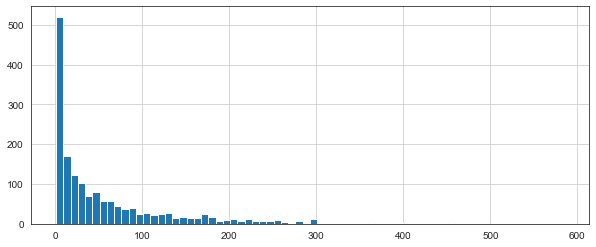

In [42]:
plt.figure(figsize=(10,4))
ratings['Num_of_ratings'].hist(bins=70)
#Ploting a histogram for number of ratings

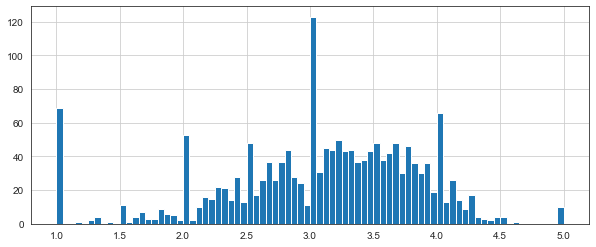

In [43]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=80)
#Ploting a histogram for rating

If we ignore the outliers then this histogram follows gaussian normal distribution 

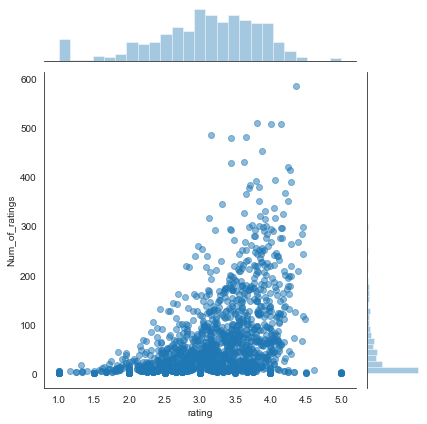

In [45]:
sns.jointplot(x='rating',y='Num_of_ratings',data=ratings,alpha=0.5)
#Creating a joint plot for understing the data better 

We have a clear understanding of the data after a simple analysis.

# Recommending Similar Movies

In [47]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
#Creating a pivot table
moviemat.head()
#Displaying the top 5 records of the dataset

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The reason why we are creating a pivot table is that based on the userid and the ratings given to the movies by the users the next movie will be suggested based on the user and other users movie ratings. 


In [48]:
ratings.sort_values("Num_of_ratings",ascending=False).head(10)
#Sorting and Displaying the top 10 instances of the dataframe 

,rating,Num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Lets choose two movies
1) Star Wars (Sci-fi),
2) Liar Liar (Comedy)

Now we will correlate these movies with the moviemat data set.

In [52]:
starwars_user_ratings = moviemat['Star Wars (1977)']
#Storing the ratings of star wars in a new variable
liarliar_user_ratings = moviemat['Liar Liar (1997)']
#Storing the ratings of liar liar in a new variable
starwars_user_ratings.head(10)

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
6    4.0
7    5.0
8    5.0
9    5.0
Name: Star Wars (1977), dtype: float64

In [55]:
starwars_similar_movies = moviemat.corrwith(starwars_user_ratings)
#Correlate the pivot table with star wars rating 
liarliar_similar_movies = moviemat.corrwith(liarliar_user_ratings)
#Correlate the pivot table with liar liar rating

In [57]:
corr_starwars = pd.DataFrame(starwars_similar_movies,columns=['Correlation'])
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [60]:
corr_liarliar = pd.DataFrame(liarliar_similar_movies,columns=['Correlation'])
corr_liarliar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145


Now if we sort the dataframe by correlation, we should get the most similar movies, however we notice that we get some results that dont make any sense because there are a lot of movies watched only once by multiple users and they watched starwars too. 

In [61]:
corr_starwars.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


Now we will have to filter out the movies having less than 100 ratings. 

In [62]:
corr_starwars = corr_starwars.join(ratings['Num_of_ratings'])
#Adding number of ratings column to the dataset 
corr_starwars.head(6)
#Displaying top 6 values of the dataset 

,Correlation,Num_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93


In [67]:
corr_starwars[corr_starwars['Num_of_ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,Num_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [74]:
movies_recommended_starwars =  corr_starwars[corr_starwars['Num_of_ratings']>100].sort_values('Correlation',ascending=False).head(4)
movies_recommended_starwars

,Correlation,Num_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420


Here we can see that as per the correlation we have obtained the similar movies which can be suggested to the users who have watched Star Wars.


In [79]:
corr_liarliar = pd.DataFrame(liarliar_similar_movies,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['Num_of_ratings'])
corr_liarliar[corr_liarliar['Num_of_ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,Num_of_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


Here we can see tha we have obtained movies similar to Liar Liar which a user will most likely want to watch next after watching Liar Liar